In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_begin.columns

Index(['timestamp', 'Viavi.Cell.Name', 'DRB.UEThpDl', 'DRB.UEThpUl',
       'RRU.PrbUsedDl', 'RRU.PrbUsedUl', 'RRU.PrbAvailDl', 'RRU.PrbAvailUl',
       'RRU.PrbTotUl', 'RRU.PrbTotDl', 'RRU.MaxLayerDlMimo',
       'CARR.AverageLayersDl', 'RRC.ConnMean', 'RRC.ConnMax',
       'QosFlow.TotPdcpPduVolumeUl', 'QosFlow.TotPdcpPduVolumeDl',
       'PEE.AvgPower', 'PEE.Energy'],
      dtype='object')

In [4]:
df_1=df_begin[['timestamp',  'RRU.PrbUsedDl', 'RRU.PrbUsedUl']].copy()
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1 = df_1.assign(
    datetime_column=convert_time,
    minute=lambda x: x['datetime_column'].dt.minute,
    hour=lambda x: x['datetime_column'].dt.hour,
    #day=lambda x: x['datetime_column'].dt.day,
    dayofweek=lambda x: x['datetime_column'].dt.dayofweek,
    #isweekend=lambda x: np.where(x['datetime_column'].dt.dayofweek > 5, 1, 0)
)
df_1.set_index('datetime_column', inplace=True)
df_1.drop(columns=['timestamp'], inplace=True)

In [5]:
df_1

,RRU.PrbUsedDl,RRU.PrbUsedUl,minute,hour,dayofweek
datetime_column,,,,,
2022-12-31 16:00:00,81.459016,81.459016,0,16,5
2022-12-31 16:00:00,50.000000,50.000000,0,16,5
2022-12-31 16:00:00,64.300000,64.300000,0,16,5
2022-12-31 16:00:00,80.900000,80.900000,0,16,5
2022-12-31 16:00:00,0.000000,0.000000,0,16,5
...,...,...,...,...,...
2023-01-07 15:59:00,0.000000,0.000000,59,15,5
2023-01-07 15:59:00,0.000000,0.000000,59,15,5
2023-01-07 15:59:00,0.000000,0.000000,59,15,5


In [6]:
try:
    df_2= df_1.resample('T').max().drop(columns=['Viavi.Cell.Name'])
except:
    df_2= df_1.resample('T').max()
df_2

,RRU.PrbUsedDl,RRU.PrbUsedUl,minute,hour,dayofweek
datetime_column,,,,,
2022-12-31 16:00:00,125.483333,118.30,0,16,5
2022-12-31 16:01:00,125.983333,122.85,1,16,5
2022-12-31 16:02:00,123.616667,113.75,2,16,5
2022-12-31 16:03:00,120.216667,109.20,3,16,5
2022-12-31 16:04:00,150.150000,145.60,4,16,5
...,...,...,...,...,...
2023-01-07 15:55:00,163.800000,150.15,55,15,5
2023-01-07 15:56:00,109.200000,104.65,56,15,5
2023-01-07 15:57:00,136.500000,136.50,57,15,5


In [7]:
df_2.query('dayofweek>5')

,RRU.PrbUsedDl,RRU.PrbUsedUl,minute,hour,dayofweek
datetime_column,,,,,
2023-01-01 00:00:00,204.083333,195.650000,0,0,6
2023-01-01 00:01:00,100.000000,100.000000,1,0,6
2023-01-01 00:02:00,163.800000,154.700000,2,0,6
2023-01-01 00:03:00,178.900000,172.900000,3,0,6
2023-01-01 00:04:00,97.366667,97.366667,4,0,6
...,...,...,...,...,...
2023-01-01 23:55:00,195.833333,191.100000,55,23,6
2023-01-01 23:56:00,227.500000,222.950000,56,23,6
2023-01-01 23:57:00,100.100000,100.000000,57,23,6


In [8]:
df_final=df_2.astype(float).copy()
print(df_final.shape)

y_train=df_final[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].loc['2022-12-31':'2023-01-06']
x_train=df_final.loc['2022-12-31':'2023-01-06']

y_validation=df_final[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].loc['2023-01-07':]
x_validation = df_final.loc['2023-01-07':]
print("shape y_train:", y_train.shape, "shape x_train:", x_train.shape, "shape y_validation:", y_validation.shape, "shape x_validation:", x_validation.shape)

(10080, 5)
shape y_train: (9120, 2) shape x_train: (9120, 5) shape y_validation: (960, 2) shape x_validation: (960, 5)


In [9]:
from sklearn.preprocessing import  StandardScaler
def scaler_data(data):
    scaler = StandardScaler()
    data_scaled= scaler.fit_transform(data)
    return data_scaled, scaler


In [10]:
x_train_scaled, x_train_scaler=scaler_data(x_train)
x_train_scaled= pd.DataFrame(x_train_scaled, columns=x_train.columns)
y_train_scaled, y_train_scaler=scaler_data(y_train)

x_validation_scaled, x_validation_scaler = scaler_data(x_validation)
x_validation_scaled = pd.DataFrame(x_validation_scaled, columns=x_validation.columns)
y_validation_scaled, y_validation_scaler = scaler_data(y_validation)

In [11]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, learning_rate=0.005, max_depth=15, n_jobs=-1)

# # Train the model
model.fit(x_train_scaled, y_train_scaled, 
          eval_set=[(x_train_scaled, y_train_scaled), (x_validation_scaled, y_validation_scaled)], 
          verbose=50)
# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
print(timestamp)
model.save_model('2_xboost_%s.json'%timestamp)

[0]	validation_0-rmse:0.99503	validation_1-rmse:0.99505
[50]	validation_0-rmse:0.77547	validation_1-rmse:0.77606
[100]	validation_0-rmse:0.60442	validation_1-rmse:0.60544
[150]	validation_0-rmse:0.47116	validation_1-rmse:0.47266
[200]	validation_0-rmse:0.36733	validation_1-rmse:0.36958
[250]	validation_0-rmse:0.28646	validation_1-rmse:0.28964
[300]	validation_0-rmse:0.22347	validation_1-rmse:0.22775
[350]	validation_0-rmse:0.17441	validation_1-rmse:0.18007
[399]	validation_0-rmse:0.13690	validation_1-rmse:0.14412
20240715_1452


In [12]:
#timestamp=20240715_1443
import xgboost as xgb
model_loaded = xgb.XGBRegressor()
model_loaded.load_model('2_xboost_%s.json'%timestamp)
#model_loaded.load_model('2_xboost_20240715_1443.json')

In [13]:
# # Make predictions
train_preds = model_loaded.predict(x_train_scaled)
test_preds = model_loaded.predict(x_validation_scaled)
train_preds_2 =   y_train_scaler.inverse_transform(train_preds)
test_preds_2  =   y_validation_scaler.inverse_transform(test_preds)

In [14]:
train_preds_2[-10:]

array([[126.86547 , 122.25819 ],
       [107.76805 , 106.35025 ],
       [222.83408 , 118.334656],
       [135.52477 , 126.18148 ],
       [123.65406 , 114.32891 ],
       [106.45005 , 104.78628 ],
       [166.94547 , 130.11374 ],
       [179.82205 , 177.31406 ],
       [198.58682 , 165.51682 ],
       [166.94547 , 149.77832 ]], dtype=float32)

In [15]:
y_train.tail(10)

,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2023-01-06 23:50:00,122.116667,118.300000
2023-01-06 23:51:00,100.000000,100.000000
2023-01-06 23:52:00,232.050000,113.750000
2023-01-06 23:53:00,131.950000,122.850000
2023-01-06 23:54:00,119.616667,109.200000
2023-01-06 23:55:00,98.066667,98.066667
2023-01-06 23:56:00,168.350000,127.400000
2023-01-06 23:57:00,182.883333,182.000000
2023-01-06 23:58:00,204.750000,168.350000


In [16]:
test_preds_2

array([[152.31328 , 106.399185],
       [191.00735 , 180.97148 ],
       [166.72105 , 153.55844 ],
       ...,
       [138.20781 , 137.88997 ],
       [233.40634 , 228.49226 ],
       [233.40634 , 228.49226 ]], dtype=float32)

In [17]:
y_validation.to_numpy()

array([[150.15, 100.  ],
       [195.65, 186.55],
       [168.35, 154.7 ],
       ...,
       [136.5 , 136.5 ],
       [273.  , 273.  ],
       [273.  , 273.  ]])

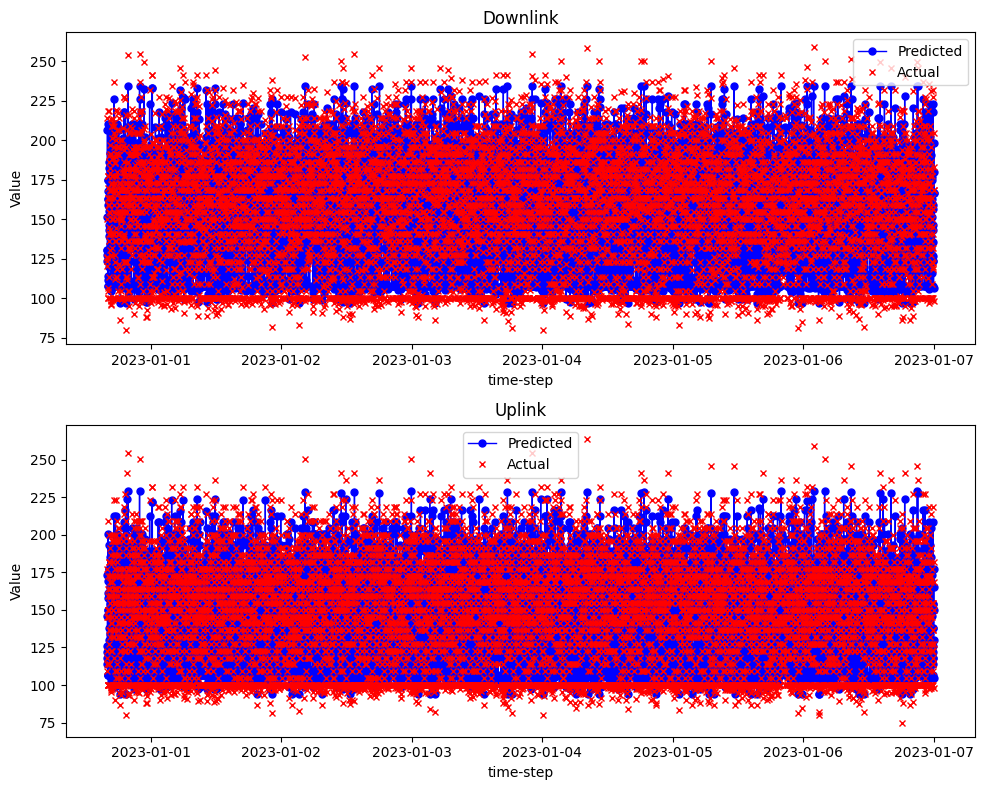

In [18]:
import matplotlib.pyplot as plt
timestep=x_train.index
# Assuming predictions and actual are numpy arrays of shape (900, 2)
feature_names = ['Downlink', 'Uplink']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for i in range(2):
    axs[i].plot(timestep, train_preds_2[:, i], label='Predicted', color='blue', marker='o', linestyle='-', markersize=5, linewidth=1)
    axs[i].plot(timestep, y_train.to_numpy()[:, i], label='Actual', color='red', marker='x', linestyle='', markersize=5, linewidth=1)
    axs[i].set_title(feature_names[i])
    axs[i].set_xlabel('time-step')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

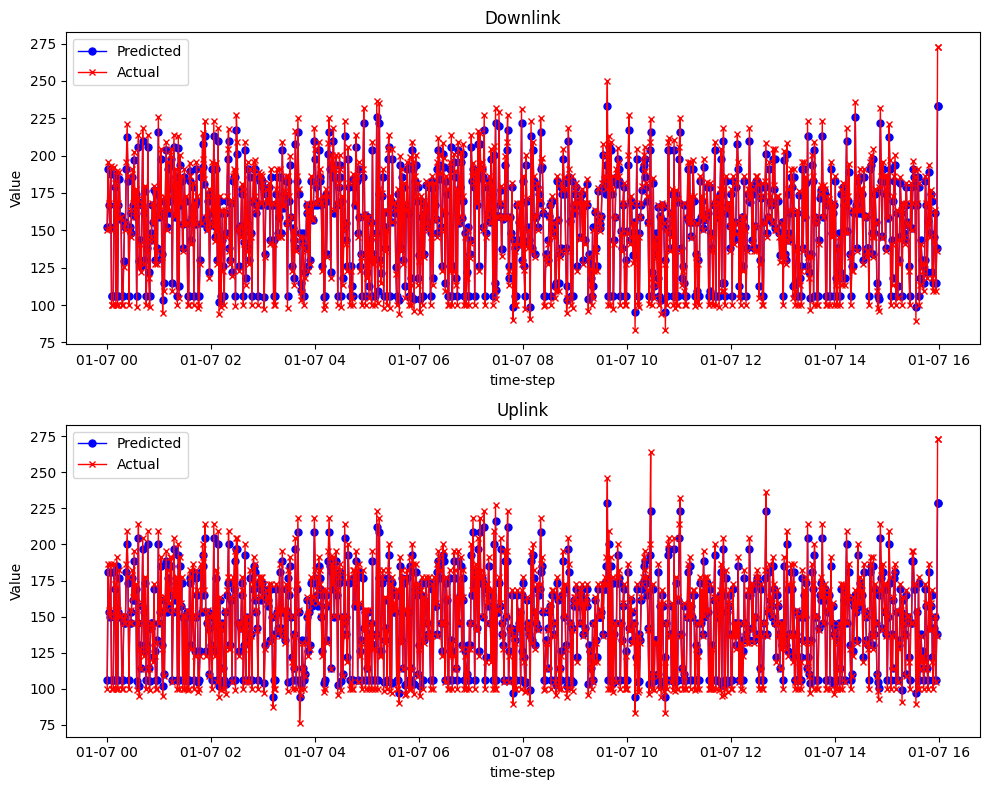

In [19]:
import matplotlib.pyplot as plt
timestep=x_validation.index
# Assuming predictions and actual are numpy arrays of shape (900, 2)
feature_names = ['Downlink', 'Uplink']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for i in range(2):
    axs[i].plot(timestep, test_preds_2[:, i], label='Predicted', color='blue', marker='o', linestyle='-', markersize=5, linewidth=1)
    axs[i].plot(timestep, y_validation.to_numpy()[:, i], label='Actual', color='red', marker='x', linestyle='-', markersize=5, linewidth=1)
    axs[i].set_title(feature_names[i])
    axs[i].set_xlabel('time-step')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

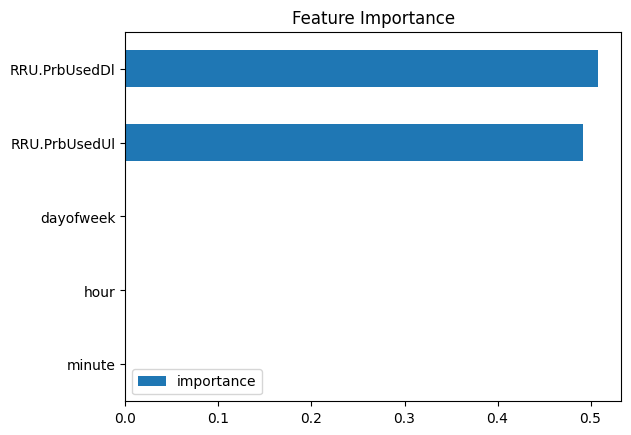

In [20]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_true and y_pred are your true and predicted values respectively
# y_true = [actual values]
# y_pred = [predicted values]

# Calculate MSE
mse = mean_squared_error(y_train.to_numpy()[:, 0], train_preds_2[:, 0])

# Calculate MAE
mae = mean_absolute_error(y_train.to_numpy()[:, 0], train_preds_2[:, 0])

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+0.0001))) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_train.to_numpy()[:, 0], train_preds_2[:, 0])

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

MSE: 24.692997627848747
MAE: 4.079895627654167
MAPE: 2.8950991374560258%


In [22]:
np.mean(np.abs(y_train.to_numpy()[:, 0]-train_preds_2[:, 0])*100/y_train.to_numpy()[:, 0])

2.895101400233845

In [23]:
np.mean(np.square(y_train.to_numpy()[:, 0]-train_preds_2[:, 0]))

24.692997627848747

In [24]:
train_preds_2[:, 0]

array([130.72473, 130.72473, 127.65727, ..., 179.82205, 198.58682,
       166.94547], dtype=float32)